In [16]:
# Import standard DS libraries
import pandas as pd
import numpy as np
import re

# Import plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)

##### Note: At some point the values doubled, this dataset has automagically updated all values to 2022 (where max value in double jeopardy is $2000)

In [2]:
# Read csv - note the index_col = 0 and dropping cols
df = pd.read_csv('master_question_list.csv', index_col = 0).drop(columns = 'index')

In [3]:
# Important - Replace NaN answers (there are two or three of them) that are literally 'Null' with the word 'Null'
df = df.fillna(f'Null')

In [4]:
# Also important - there are 2011 years listed as just '11', so they need to be converted to 2011
df['show_yr'] = np.where(df['show_yr'] == 11, 2011, df['show_yr'])

In [5]:
df.info()
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285181 entries, 0 to 285180
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   show_num    285181 non-null  int64 
 1   show_yr     285181 non-null  int64 
 2   show_mo     285181 non-null  object
 3   round       285181 non-null  object
 4   category    285181 non-null  object
 5   value       285181 non-null  object
 6   clue        285181 non-null  object
 7   is_DD       285181 non-null  int64 
 8   answer      285181 non-null  object
 9   is_stumper  285181 non-null  int64 
 10  level       285181 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 26.1+ MB


show_num  show_yr   show_mo            round  \
161691      6609     2013       May  Double Jeopardy   
157616      6542     2013  February         Jeopardy   
214708      7507     2017     April         Jeopardy   
182086      6952     2014  December         Jeopardy   
51025       4760     2005     April         Jeopardy   

                                   category value  \
161691                        NEW IN OXFORD  1200   
157616       THE WEATHER & GEOGRAPHY REPORT   200   
214708                THEIR FIRST NO. 1 HIT   800   
182086  THE LION, THE WITCH OR THE WARDROBE   800   
51025                           TAKE "FIVE"   600   

                                                                                                        clue  \
161691  A "savior sibling" is a child conceived in vitro in the hope that he or she may do this specific act   
157616         It gets hot in El Azizia, near Tripoli, in this country--hot like 124 degrees one day in 1922   
214708                                                                                    "Just Dance"(2009)   
182086                                                                       A pro athlete in the Motor City   
51025                                                        Self-governing name for the Choctaws & 4 others   

        is_DD                     answer  is_stumper  level  
161691      0            donate an organ           0      2  
157616      0                      Libya           0      1  
214708      0                  Lady Gaga           1      5  
182086      0                   the Lion           0      2  
51025       0  the Five Civilized Tribes           0      2

### Check all value counts to see if there is other fishy stuff. 

In [ ]:
m = df[['show_yr','show_mo','round','value','is_DD','is_stumper','level']]
for col in m.columns:
    print(df[col].value_counts())
    print('\n-----\n')

### What are these years with '11'?

In [ ]:
df[df.show_yr == 11].head()

In [ ]:
df[df.show_num == 6088]

##### Examine year vs month, to see if taping has changed, just for funsies

In [ ]:
sns.scatterplot(data = df, x = 'show_yr', y = 'show_mo')
plt.show()

### Check Daily Double vs Value Frequency

In [ ]:
# Create dataframe of daiyl doubles only
dd = df[df.is_DD == True]

In [ ]:
dd_j = dd[dd['round'] == 'Jeopardy']
dd_dj = dd[dd['round'] == 'Double Jeopardy']

In [ ]:
plt.figure(figsize = (8,12))
plt.subplot(211)
sns.histplot(dd_j.value)
plt.xlabel('Jeopardy Round Value')
plt.subplot(212)
sns.histplot(dd_dj.value)
plt.xlabel('Double Jeopardy Round Value')
plt.show()

By percentage:

In [ ]:
dd_j.value.value_counts(normalize = True)

In [ ]:
dd_dj.value.value_counts(normalize = True)

### What percentage of answers have been repeated?

In [ ]:
# Note - since many answers are repeated multiple times, must use
# duplicated and not nunique, which will undercount.
repeats = df[df.answer.duplicated(keep=False)].shape[0]

In [ ]:
f'{round(repeats/df.answer.shape[0],3)*100}%'

In [ ]:
df.answer.value_counts().nlargest(10)

### What about questions?

In [ ]:
clue_repeats = df[df.clue.duplicated(keep=False)].shape[0]

In [ ]:
f'{round(clue_repeats/df.clue.shape[0],3)*100}%'

In [ ]:
df[df.clue.duplicated(keep=False)].clue.value_counts()

In [ ]:
df[df.clue == '"I Hope I Get It"']

### Top Answers

In [ ]:
# Seperate j and dj from final jeopardy
game = df[df['round'] != 'Final Jeopardy']
game.info()

In [ ]:
game.answer.value_counts().nlargest(25)

### Top Final Jeopardy Answers

In [ ]:
fj = df[df['round'] == "Final Jeopardy"]
fj.info()
fj.head()

In [ ]:
fj.answer.value_counts().nlargest(20)

### Top categories over the full 20 years

In [ ]:
df.category.value_counts().nlargest(20)

### Top categories over the past 5 years

In [ ]:
df5 = df[df.show_yr > 2016]
df5.category.value_counts().nlargest(20)

### Triple Stumpers

In [ ]:
ts = df[df.is_stumper == 1]
ts.info()
ts.sample(5)

Have questions been getting more difficult?


In [ ]:
sns.histplot(data = ts, x = 'show_yr', bins = 22, binrange = (2000,2023))

That one year is really interesteing, let's see when it was and how it compares to average.

In [ ]:
ts.groupby('show_yr').show_num.count()

### Where are the difficult questions?

In [ ]:
ts['value'].value_counts()

In [ ]:
plt.figure(figsize = (24,24))
sns.distplot(ts['value'])

### Else...

In [ ]:
df[df.category.str.contains('.POET.')].answer.value_counts().nlargest(20)

In [ ]:
current_level = 1

In [ ]:
button_text = df[df.level == current_level].sample(4)

In [ ]:
button_text

In [ ]:
button_text.iloc[1][4]

In [ ]:
for i in range(len(button_text)):
    print(button_text.iloc[i][4])

# NLP Stuff

##### Need to tighten up and comment

In [40]:
import nltk

Going to look at Stumpers first to see if there is any connection.

In [12]:
stumps = pd.concat([df.is_stumper.value_counts(),
                    df.is_stumper.value_counts(normalize=True)], axis=1)
stumps.columns = ['n', 'percent']
stumps

n   percent
0  245399  0.860503
1   39782  0.139497

In [6]:
from nlp_prepare import full_clean

In [11]:
stumpers = full_clean(' '.join(df[df.is_stumper == 1].clue))
answered = full_clean(' '.join(df[df.is_stumper == 0].clue))
all_clues = full_clean(' '.join(df.clue))

Removed 253813 stopwords
Removed 1525614 stopwords
Removed 1779427 stopwords


In [28]:
stumpers_freq = pd.Series(stumpers.split()).value_counts()
answered_freq = pd.Series(answered.split()).value_counts()
all_clues_freq = pd.Series(all_clues.split()).value_counts()

In [32]:
word_counts = (pd.concat([stumpers_freq, answered_freq, all_clues_freq], axis=1, sort=True)
                .set_axis(['stumpers', 'answered', 'all'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

In [35]:
pd.concat([word_counts[word_counts.stumpers == 0].sort_values(by='answered').tail(20),
           word_counts[word_counts.answered == 0].sort_values(by='stumpers').tail(20)])

stumpers  answered  all
howl                  0        32   32
idiomatically         0        32   32
sooner                0        33   33
pronounce             0        34   34
mutant                0        34   34
1603                  0        34   34
toilet                0        34   34
employ                0        34   34
vegetarian            0        36   36
hump                  0        36   36
distress              0        36   36
hottest               0        36   36
deeply                0        37   37
exploded              0        37   37
dicaprio              0        38   38
livin                 0        41   41
mattress              0        41   41
wardrobe              0        44   44
tuber                 0        45   45
packed                0        49   49
maule                 3         0    3
affairn               3         0    3
odets                 3         0    3
schouten              3         0    3
writhes               3         0    3
clayburgh             3         0    3
oni                   3         0    3
boogity               3         0    3
malleable             3         0    3
scutum                3         0    3
mackinlay             3         0    3
katmai                3         0    3
astrophel             4         0    4
fica                  4         0    4
goosey                4         0    4
mswati                4         0    4
yoho                  4         0    4
paricutin             4         0    4
coppelia              4         0    4
manse                 6         0    6

In [36]:
from wordcloud import WordCloud

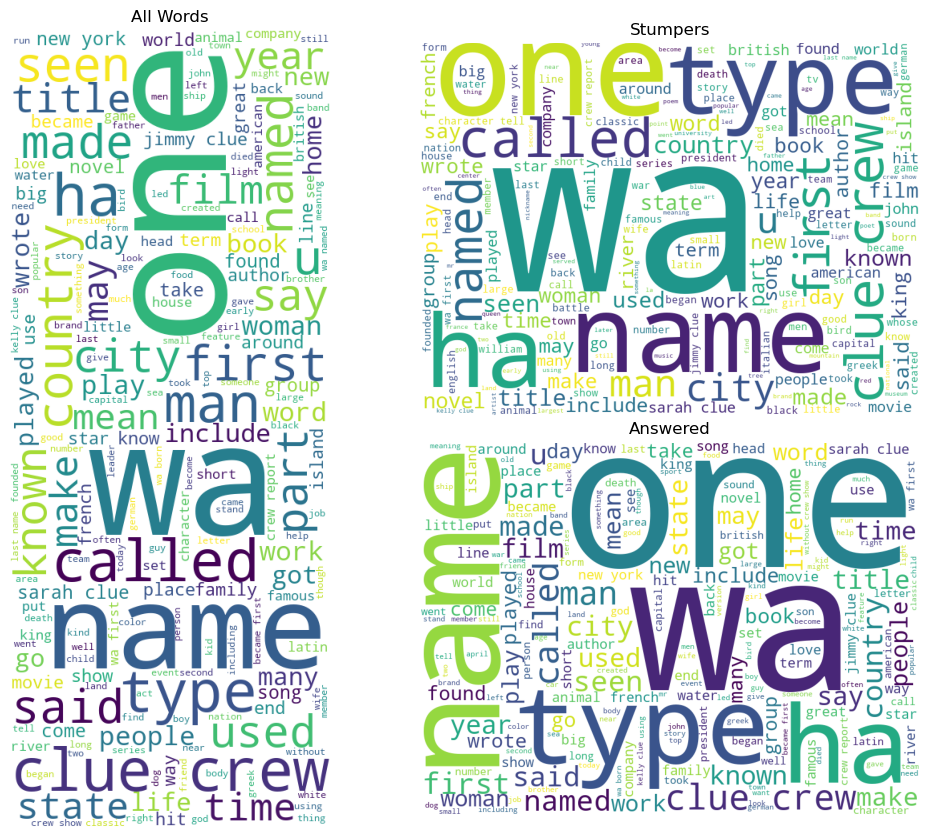

In [37]:
all_cloud = WordCloud(background_color='white', height=1000, width=400).generate(all_clues)
stumpers_cloud = WordCloud(background_color='white', height=600, width=800).generate(stumpers)
answered_cloud = WordCloud(background_color='white', height=600, width=800).generate(answered)

plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_cloud)
axs[1].imshow(stumpers_cloud)
axs[2].imshow(answered_cloud)

axs[0].set_title('All Words')
axs[1].set_title('Stumpers')
axs[2].set_title('Answered')

for ax in axs: ax.axis('off')

In [50]:
top_20_stumper_bigrams = (pd.Series(nltk.ngrams(stumpers, 2))
                      .value_counts())

In [44]:
testes = [i for i in top_20_stumper_bigrams if len(i[0]) > 2]    

TypeError: 'int' object is not subscriptable

In [9]:
newrow = []
for row in df.clue:
    yo = {}
    yo['entry'] = full_clean(row)
    newrow.append(yo)

Removed 5 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 12 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 1 stopwords
Removed 7 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 20 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 25 stopwords
Removed 11 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 1 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 6 stop

Removed 7 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 0 stopwords
Removed 2 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 2 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 13 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 0 stopwords

Removed 5 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 12 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 11 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 11 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 9 stopw

Removed 6 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 2 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 12 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 2 stopwords
Removed 0 stopwords
Removed 3 stopwor

Removed 9 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 11 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 11 stopwords
Removed 4 stopwords
Removed 10 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 12 st

Removed 13 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 12 stopwords
Removed 12 stopwords
Removed 9 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 15 stopwords
Removed 4 stopwords
Removed 12 stopwords
Removed 2 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 8 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 3 stopwords
Removed 11 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 11 stopwords
Removed 2 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 5 s

Removed 8 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 11 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 11 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 9 stopwo

Removed 4 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 11 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 12 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 13 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 13 stopwords
Removed 5 stopwo

Removed 7 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 2 stopwords
Removed 11 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 2 stopwor

Removed 7 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 14 stopwords
Removed 9 stopwords
Removed 3 stopwords
Removed 11 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 2 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 11 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 1 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 9 stopw

Removed 4 stopwords
Removed 7 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 17 stopwords
Removed 13 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 10 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 14 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 2 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 11 stopwords
Removed 13 stopwords
Removed 7 

Removed 7 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 11 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 1 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 1 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 12 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 7 stopwor

Removed 5 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 0 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 13 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 16 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 12 stopwor

Removed 6 stopwords
Removed 1 stopwords
Removed 5 stopwords
Removed 12 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 12 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 10 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 2 stopwords
Removed 9 sto

Removed 2 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 0 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 11 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 11 stopwords
Removed 13 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 1 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 9 stopwo

Removed 6 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 12 stopwords
Removed 8 stopwords
Removed 2 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 12 stopwords
Removed 5 stopwords
Removed 7 stopwo

Removed 8 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 1 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 13 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 12 stopwords
Removed 10 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 3 stopwo

Removed 1 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 1 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 14 stopwords
Removed 9 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 1 stopwords
Removed 2 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 7 stopword

Removed 5 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 2 stopwords
Removed 0 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 15 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 0 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 5 stopword

Removed 7 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 12 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 11 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 14 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 2 stopwords
Removed 4 stop

Removed 5 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 12 stopwords
Removed 8 stopwords
Removed 15 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 12 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 12 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 5 sto

Removed 4 stopwords
Removed 1 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 1 stopwords
Removed 3 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 16 stopwords
Removed 6 stopwords
Removed 11 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 1 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 12 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 13 stopwords
Removed 13 stopwords
Removed 3 stopwords
Removed 4 s

Removed 7 stopwords
Removed 14 stopwords
Removed 8 stopwords
Removed 12 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 13 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 1 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 12 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 4 st

Removed 4 stopwords
Removed 6 stopwords
Removed 12 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 13 stopwords
Removed 10 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 12 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 13 stopwords
Removed 11 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 8 

Removed 6 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 15 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 12 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 15 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 11 stopwords
Removed 5 stopwords
Removed 12 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 11 s

Removed 3 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 11 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 11 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 10 stopwords
Removed 11 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 2 stopwords
Removed 1 stopwords
Removed 4 s

Removed 5 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 17 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 13 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 11 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 11 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 6 st

Removed 7 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 12 stopwords
Removed 4 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 12 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 11 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 11 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 12 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 6 s

Removed 4 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 1 stopwords
Removed 6 stopwords
Removed 1 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 14 stopwords
Removed 9 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 3 stopwo

Removed 8 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 12 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 10 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 14 stopwords
Removed 12 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 18 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 12 stopwords
Removed 11 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 0 stopwords
Removed 5 stopwords
Removed 1 st

Removed 7 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 12 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 13 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 12 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 11 stopwords
Removed 1 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 4 stopw

Removed 4 stopwords
Removed 7 stopwords
Removed 12 stopwords
Removed 7 stopwords
Removed 12 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 1 stopwords
Removed 2 stopwords
Removed 1 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 12 stopwords
Removed 5 stopwords
Removed 13 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 11 sto

Removed 1 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 9 stopwords
Removed 2 stopwords
Removed 12 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 2 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 11 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 12 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 11 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 1 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 3 stopwords
Removed 4 st

Removed 6 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 16 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 2 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 1 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 1 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 14 stopwords
Removed 13 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 5 stopw

Removed 8 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 11 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 12 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 20 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 10 stopwords
Removed 15 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 4 sto

Removed 8 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 6 stopwords
Removed 1 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 13 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 4 stopwo

Removed 4 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 13 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 14 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 12 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 6 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 8 stopw

Removed 9 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 12 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 12 stopwords
Removed 6 stopwords
Removed 11 stopwords
Removed 3 stopwords
Removed 11 stopwords
Removed 9 stopwords
Removed 14 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 11 stopwords
Removed 12 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 13 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 8 s

Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 11 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 12 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 19 stopwords
Removed 17 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 3 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 0 stopw

Removed 7 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 11 stopwords
Removed 12 stopwords
Removed 12 stopwords
Removed 14 stopwords
Removed 11 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 12 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 14 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 15 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 4 

Removed 7 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 12 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 13 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 4 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 12 stopwords
Removed 9 stopwords
Removed 12 stopwords
Removed 4 stopwords
Removed 11 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 12 stopwords
Removed 7 s

Removed 7 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 12 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 12 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 12 stopwords
Removed 11 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 9 s

Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 1 stopwords
Removed 5 stopwords
Removed 12 stopwords
Removed 10 stopwords
Removed 11 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 5 sto

Removed 9 stopwords
Removed 13 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 1 stopwords
Removed 4 stopwords
Removed 1 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 20 stopwords
Removed 17 stopwords
Removed 16 stopwords
Removed 16 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 11 st

Removed 12 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 9 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 11 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 12 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 11 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 0

Removed 0 stopwords
Removed 22 stopwords
Removed 6 stopwords
Removed 18 stopwords
Removed 4 stopwords
Removed 24 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 12 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 1 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 6 stopw

Removed 5 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 1 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 10 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 1 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 11 sto

Removed 6 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 13 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 19 stopwords
Removed 3 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 3 stopwo

Removed 3 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 13 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 0 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 1 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 0 stopwords
Removed 0 stopwords

Removed 4 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 11 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 14 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 13 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 10 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 12 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 2 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 5 sto

Removed 0 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 18 stopwords
Removed 9 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 10 stopwords
Removed 5 stop

Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 12 stopwords
Removed 16 stopwords
Removed 4 stopwords
Removed 15 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 16 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 13 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 2 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 0 stopwords
Removed 2 stopwords
Removed 8 stopwords
Removed 12 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 5 st

Removed 8 stopwords
Removed 19 stopwords
Removed 13 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 13 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 1 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 11 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 7 st

Removed 8 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 1 stopwords
Removed 6 stopwords
Removed 13 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 15 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 11 stopwords
Removed 3 stopwords
Removed 11 stopwords
Removed 2 stopwords
Removed 9 stopwords
Removed 7 stopw

Removed 5 stopwords
Removed 3 stopwords
Removed 1 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 15 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 1 stopwords
Removed 3 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 20 stopwords
Removed 12 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 5 s

Removed 5 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 11 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 1 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 10 stopwords
Removed 2 stopwords
Removed 16 stopwords
Removed 8 stopwords
Removed 12 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 7 sto

Removed 10 stopwords
Removed 8 stopwords
Removed 12 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 11 stopwords
Removed 4 stopwords
Removed 20 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 14 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 39 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 4 sto

Removed 16 stopwords
Removed 12 stopwords
Removed 12 stopwords
Removed 13 stopwords
Removed 1 stopwords
Removed 7 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 5 stopwords
Removed 11 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 0 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 1 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 14 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 12 s

Removed 6 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 0 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 10 stopwords
Removed 1 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 13 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 12 stopwords
Removed 13 stopwords
Removed 12 stopwords
Removed 12 stopwords
Removed 17 stopwords
Removed 16 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 1

Removed 4 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 17 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 2 stopwo

Removed 3 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 15 stopwords
Removed 3 stopwords
Removed 16 stopwords
Removed 5 stopwords
Removed 13 stopwords
Removed 8 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 11 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 13 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 12 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 1 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 10 st

Removed 7 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 12 stopwords
Removed 1 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 14 stopwords
Removed 12 stopwords
Removed 13 stopwords
Removed 11 stopwords
Removed 15 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 12 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 5 st

Removed 9 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 18 stopwords
Removed 5 stopwords
Removed 17 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 2 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 5 stopwor

Removed 5 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 7 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 16 stopwords
Removed 13 stopwords
Removed 12 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 14 stopwords
Removed 12 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 11 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 8

Removed 5 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 0 stopwords
Removed 2 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 3 stopwords
Removed 11 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 12 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 11 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 6 stopw

Removed 7 stopwords
Removed 9 stopwords
Removed 13 stopwords
Removed 9 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 0 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 0 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 9 stopwor

Removed 1 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 1 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 13 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 3 stopwords
Removed 15 stopwords
Removed 13 stopwords
Removed 12 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 14 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 13 stopwords
Removed 5 stopwords
Removed 15 stopwords
Removed 3 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 1

Removed 5 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 11 stopwords
Removed 1 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 21 stopwords
Removed 13 stopwords
Removed 12 stopwords
Removed 13 stopwords
Removed 15 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 0 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 1 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 6 st

Removed 7 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 19 stopwords
Removed 11 stopwords
Removed 25 stopwords
Removed 15 stopwords
Removed 17 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 15 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 1 stopwords
Remov

Removed 6 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 11 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 1 stopwords
Removed 2 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 12 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 10 stopwords
Removed 12 stopwords
Removed 4 stopwords
Removed 10 stop

Removed 7 stopwords
Removed 4 stopwords
Removed 12 stopwords
Removed 10 stopwords
Removed 10 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 1 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 1 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 13 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 0 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 12 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 7 stop

Removed 9 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 11 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 2 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 14 stopwords
Removed 4 stopwords
Removed 11 stopwords
Removed 9 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 4 stopw

Removed 5 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 21 stopwords
Removed 10 stopwords
Removed 11 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 12 stopwords
Removed 4 stopwords
Removed 10 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 2 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 12 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 3 s

Removed 9 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 2 stopwords
Removed 1 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 13 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 10 stopwords
Removed 3 stopwords
Removed 11 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 2 stopwords
Removed 1 stopwords
Removed 4 stopwords
Removed 0 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 7 stopw

Removed 6 stopwords
Removed 9 stopwords
Removed 10 stopwords
Removed 12 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 0 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 12 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 1 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 0 stopwords
Removed 5 stopwo

Removed 6 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 23 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 11 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 1 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 2 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 10 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 11 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 4 st

Removed 7 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 16 stopwords
Removed 17 stopwords
Removed 11 stopwords
Removed 13 stopwords
Removed 15 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 

Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 11 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 12 stopwords
Removed 2 stopwords
Removed 16 stopwords
Removed 10 stopwords
Removed 12 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 9 stop

Removed 7 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 1 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 21 stopwords
Removed 14 stopwords
Removed 11 stopwords
Removed 12 stopwords
Removed 7 stopwords
Removed 19 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 0 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 5 sto

Removed 0 stopwords
Removed 0 stopwords
Removed 8 stopwords
Removed 11 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 19 stopwords
Removed 12 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 1 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 9 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 11 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 11 stopwords
Removed 8 stopw

Removed 9 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 1 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 11 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 13 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 16 stopwords
Removed 15 stopwords
Removed 9 stopwords
Removed 15 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 12 stopwords
Removed 13 stopwords
Removed 10 stopwords
Removed 

Removed 7 stopwords
Removed 4 stopwords
Removed 14 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 12 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 1 stopwords
Removed 9 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 11 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 11 stopwords
Removed 4 stopwords
Removed 10 stopwords
Removed 13 stopwords
Removed 6 stopwords
Removed 16 stopwords
Removed 8 stopwords
Removed 18 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 5 

Removed 2 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 0 stopwords
Removed 2 stopwords
Removed 1 stopwords
Removed 2 stopwords
Removed 12 stopwords
Removed 19 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 18 stopwords
Removed 10 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 9 stopwo

Removed 17 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 12 stopwords
Removed 6 stopwords
Removed 12 stopwords
Removed 10 stopwords
Removed 16 stopwords
Removed 9 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 13 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 1 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 1 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 4 s

Removed 10 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 14 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 16 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 13 stopwords
Removed 6 stopwords
Removed 13 stopwords
Removed 16 stopwords
Removed 14 stopwords
Removed 12 stopwords
Removed 16 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 14 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 13 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 10 stopwords
Removed 13 stopwords
Removed 9 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 6 stopwords
R

Removed 6 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 1 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 1 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 1 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 13 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 7 stopwords
Removed 8 stopword

Removed 5 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 1 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 2 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 12 stopwords
Removed 5 stopwor

Removed 13 stopwords
Removed 11 stopwords
Removed 7 stopwords
Removed 15 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 12 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 2 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 12 stopwords
Removed 9 stopwords
Removed 10 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 4 sto

Removed 6 stopwords
Removed 12 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 10 stopwords
Removed 11 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 12 stopwords
Removed 5 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 1 stopwords
Removed 2 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 9 stop

Removed 7 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 12 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 11 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 14 stopwords
Removed 7 stopwords
Removed 16 stopwords
Removed 8 stopwords
Removed 14 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 14 stopwords
Removed 13 stopwords
Removed 12 stopwords
Removed 12 stopwords
Removed 16 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 4

Removed 3 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 11 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 4 stopwords
Removed 12 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 9 stopw

Removed 6 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 16 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 11 stopwords
Removed 2 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 6 stop

Removed 4 stopwords
Removed 13 stopwords
Removed 15 stopwords
Removed 11 stopwords
Removed 13 stopwords
Removed 13 stopwords
Removed 12 stopwords
Removed 8 stopwords
Removed 11 stopwords
Removed 12 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 1 stopwords
Removed 2 stopwords
Removed 0 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 8

Removed 4 stopwords
Removed 8 stopwords
Removed 12 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 12 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 1 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 1 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 17 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 13 stopwords
Removed 8 stopwords
Removed 12 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 8 stop

Removed 4 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 18 stopwords
Removed 16 stopwords
Removed 13 stopwords
Removed 15 stopwords
Removed 13 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 15 stopwords
Removed 11 s

Removed 7 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 16 stopwords
Removed 21 stopwords
Removed 14 stopwords
Removed 19 stopwords
Removed 14 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 6 stop

Removed 8 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 7 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 12 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 13 stopwords
Removed 13 stopwords
Removed 17 stopwords
Removed 6 stopwords
Removed 18 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 4 st

Removed 12 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 14 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 7 stopwo

Removed 4 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 2 stopwords
Removed 15 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 14 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 15 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 13 stopwords
Removed 4 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 1 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 1 stopwords
Removed 3 stopwords
Removed 12 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 7 sto

Removed 6 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 1 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 1 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 10 stop

Removed 6 stopwords
Removed 2 stopwords
Removed 1 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 12 stopwords
Removed 14 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 16 stopwords
Removed 6 stop

Removed 7 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 11 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 11 stopwords
Removed 11 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 5 s

Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 11 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 2 stopw

Removed 5 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 2 stopwords
Removed 16 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 1 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 13 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 1 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 12 stopwords
Removed 8 stopwords
Removed 9 stopw

Removed 4 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 10 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 1 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 16 stopwords
Removed 11 stopwords
Removed 10 stopwords
Removed 11 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 1 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 2 st

Removed 9 stopwords
Removed 8 stopwords
Removed 15 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 10 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 10 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 15 stopwords
Removed 4 stop

Removed 2 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 1 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 12 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 10 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 6 stopwo

Removed 7 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 11 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 2 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 3 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 8 stopw

Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 12 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 12 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 0 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 18 stopwords
Removed 1 stopwords
Removed 9 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 9 stopwords
Removed 8 stopwo

Removed 6 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 13 stopwords
Removed 14 stopwords
Removed 20 stopwords
Removed 21 stopwords
Removed 24 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 4 stopwords
Removed 11 stopwords
Removed 19 stopwords
Removed 8 stopwords
Removed 1 stopwords
Removed 2 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 8 st

Removed 11 stopwords
Removed 18 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 13 stopwords
Removed 8 stopwords
Removed 20 stopwords
Removed 6 stopwords
Removed 23 stopwords
Removed 3 stopwords
Removed 11 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 2 stopwords
Removed 0 stopwords
Removed 6 stopwords
Removed 0 stopwords
Removed 2 stopwords
Removed 0 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 9 stopwords
Removed 12 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 7 st

Removed 4 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 21 stopwords
Removed 11 stopwords
Removed 26 stopwords
Removed 10 stopwords
Removed 12 stopwords
Removed 11 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 11 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 13 stopwords
Removed 14 

Removed 21 stopwords
Removed 16 stopwords
Removed 6 stopwords
Removed 1 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 13 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 13 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 18 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 11 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 8 st

Removed 10 stopwords
Removed 4 stopwords
Removed 1 stopwords
Removed 2 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 1 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 12 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 11 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 12 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 8 stopw

Removed 11 stopwords
Removed 7 stopwords
Removed 2 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 13 stopwords
Removed 19 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 10 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 14 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 18 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 12 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 3

Removed 8 stopwords
Removed 10 stopwords
Removed 13 stopwords
Removed 11 stopwords
Removed 10 stopwords
Removed 2 stopwords
Removed 0 stopwords
Removed 3 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 1 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 7 stop

Removed 6 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 2 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 20 stopwords
Removed 11 stopwords
Removed 14 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 15 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 11 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 3 sto

Removed 1 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 12 stopwords
Removed 13 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 11 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 1 stopwords
Removed 3 stopwords
Removed 1 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 9 sto

Removed 4 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 15 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 18 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 14 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 6 stopwo

Removed 6 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 2 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 15 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 22 stopwords
Removed 17 stopwords
Removed 17 stopwords
Removed 22 stopwords
Removed 12 stopwords
Removed 0 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 17 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 1 stopwords
Removed 5 stopwords
Removed 3 s

Removed 8 stopwords
Removed 13 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 13 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 1 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 11 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 9 stopwor

Removed 3 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 12 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 3 stopwords
Removed 12 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 1 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 1 stopwords
Removed 2 stopwords
Removed 17 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 15 stopwords
Removed 16 stopwords
Removed 17 stopwords
Removed 17 stopwords
Removed 14 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 14 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 1 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed

Removed 5 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 1 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 12 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 7 stopwords
Removed 18 stopwords
Removed 7 stopwords
Removed 20 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 3 stopwo

Removed 7 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 0 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 11 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 14 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 1 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 5 stopwor

Removed 12 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 12 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 12 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 2 stopwords
Removed 7 stopwords
Removed 12 stopwords
Removed 10 st

Removed 4 stopwords
Removed 2 stopwords
Removed 0 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 1 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 10 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 6 stopwords
Removed 1 stopwo

Removed 2 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 0 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 1 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 17 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 11 stopwords
Removed 10 stopwords
Removed 13 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 1 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 10 stopwords
Removed 4 stopwords
Removed 5 stop

Removed 5 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 11 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 12 stopwords
Removed 10 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 1 stopwords
Removed 4 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 6 stopw

Removed 6 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 13 stopwords
Removed 9 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 2 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 11 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 12 stopwords
Removed 12 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 3 sto

Removed 4 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 1 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 0 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 13 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 28 stopwords
Removed 19 stopwords
Removed 17 stopwords
Removed 22 stopwords
Removed 18 stopwords
Removed 6 stopwords
Removed 13 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 11 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 9 st

Removed 4 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 18 stopwords
Removed 7 stopwords
Removed 0 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 1 stopwords
Removed 2 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 12 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 13 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 12 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 13 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 8 stop

Removed 4 stopwords
Removed 1 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 15 stopwords
Removed 17 stopwords
Removed 11 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 11 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 17 stopwords
Removed 5 stopwords
Removed 4 st

Removed 2 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 19 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 11 stopwords
Removed 5 stopwo

Removed 9 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 22 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 10 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 5 stopwor

Removed 11 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 1 stopwords
Removed 10 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 2 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 17 stopwords
Removed 18 stopwords
Removed 20 stopwords
Removed 20 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 12 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 11 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 2 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 5 

Removed 11 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 1 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 18 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 1 stopwords
Removed 2 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 4 stopwo

Removed 18 stopwords
Removed 25 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 1 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 13 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 0 stopwords
Removed 4

Removed 4 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 0 stopwords
Removed 3 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 12 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 2 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 14 stopw

Removed 8 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 2 stopwords
Removed 10 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 2 stopwor

Removed 7 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 14 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 11 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 12 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 20 stopwords
Removed 23 stopwords
Removed 17 stopwords
Removed 12 stopwords
Removed 11 stopwords
Removed

Removed 6 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 13 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 14 stopwords
Removed 9 stopwords
Removed 12 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 1 stopwords
Removed 6 stopwords
Removed 1 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 13 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 3 stop

Removed 6 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 1 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 12 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 5 stopwords

Removed 13 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 8 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 13 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 12 stopwords
Removed 5 stopwords
Removed 21 stopwords
Removed 10 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 8 stop

Removed 9 stopwords
Removed 4 stopwords
Removed 0 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 1 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 21 stopwords
Removed 22 stopwords
Removed 20 stopwords
Removed 20 stopwords
Removed 18 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 15 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 11 stopwords
Removed 11 stopwords
Removed 11 stopwords
Removed 0 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 12

Removed 4 stopwords
Removed 7 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 4 stopwords
Removed 15 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 18 stopwords
Removed 16 stopwords
Removed 15 stopwords
Removed 16 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 11 stopwords
Removed 10 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 11 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 11 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 18 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 13 stopwords
Removed 3

Removed 5 stopwords
Removed 12 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 16 stopwords
Removed 13 stopwords
Removed 16 stopwords
Removed 20 stopwords
Removed 14 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 1 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 1 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 7 stopwords
Removed 6 sto

Removed 1 stopwords
Removed 1 stopwords
Removed 3 stopwords
Removed 1 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 14 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 2 stopwords
Removed 1 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 1 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 2 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 9 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 8 stopword

Removed 8 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 11 stopwords
Removed 20 stopwords
Removed 11 stopwords
Removed 17 stopwords
Removed 12 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 1 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 12 stopwords
Removed 11 st

Removed 12 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 21 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 4 sto

Removed 6 stopwords
Removed 19 stopwords
Removed 9 stopwords
Removed 13 stopwords
Removed 17 stopwords
Removed 18 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 1 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 1 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 16 stopwords
Removed 9 stop

Removed 7 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 13 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 5 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 18 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 10 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 4 stopwo

Removed 7 stopwords
Removed 2 stopwords
Removed 7 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 13 stopwords
Removed 9 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 16 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 8 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 13 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 13 stopwords
Removed 12 stopwords
Removed 6 stopwords
Removed 8 sto

Removed 10 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 11 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 1 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 11 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 12 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 9 stopw

Removed 8 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 17 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 1 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 1 stopwords
Removed 2 stopwords
Removed 0 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 6 stop

Removed 4 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 12 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 11 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 26 stopwords
Removed 17 stopwords
Removed 20 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 1 stopwords
Removed 2 stopwords
Removed 1 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 11 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 4 sto

Removed 1 stopwords
Removed 3 stopwords
Removed 0 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 11 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 12 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 11 stopwords
Removed 5 stopwords
Removed 14 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 8 sto

Removed 4 stopwords
Removed 6 stopwords
Removed 12 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 12 stopwords
Removed 10 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 14 stopwords
Removed 9 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 11 stopwords
Removed 11 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 8 

Removed 10 stopwords
Removed 4 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 11 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 17 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 11 stopwords
Removed 0 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 1 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 15 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 9 

Removed 4 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 1 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 1 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 4 stopword

Removed 5 stopwords
Removed 11 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 13 stopwords
Removed 8 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 3 stopwords
Removed 12 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 5 stop

Removed 6 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 1 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 11 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 12 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 5 stopwo

Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 2 stopwords
Removed 1 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 0 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 9 stopwords


Removed 11 stopwords
Removed 11 stopwords
Removed 11 stopwords
Removed 11 stopwords
Removed 11 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 17 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 11 stopwords
Removed 4 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 11 stopwords
Removed 10 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 7 stopwords
Removed

Removed 5 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 11 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 18 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 12 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 16 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 3 st

Removed 6 stopwords
Removed 8 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 10 stopwords
Removed 12 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 12 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 19 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 2 stopwords
Removed 7 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 5 stop

Removed 5 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 13 stopwords
Removed 5 stopwords
Removed 11 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 12 stopwords
Removed 9 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 11 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 15 stopwords
Removed 5 sto

Removed 7 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 11 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 11 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 8 stopw

Removed 0 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 10 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 20 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 1 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 5 stopwo

Removed 4 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 12 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 14 stopwords
Removed 3 stopwords
Removed 12 stopwords
Removed 8 stopwords
Removed 12 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 12 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 3 sto

Removed 8 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 1 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 1 stopwords
Removed 2 stopwords
Removed 11 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 2 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 19 stopwords
Removed 5 stopwords
Removed 7 stopwo

Removed 3 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 1 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 13 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 12 stopwords
Removed 11 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 1 stopwords
Removed 3 stopwords
Removed 11 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 11 stopwords
Removed 12 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 

Removed 11 stopwords
Removed 3 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 12 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 1 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 12 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 8 stopwo

Removed 18 stopwords
Removed 18 stopwords
Removed 18 stopwords
Removed 16 stopwords
Removed 14 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 24 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 6

Removed 3 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 16 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 0 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 1 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 2 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 4 stopwo

Removed 5 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 11 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 10 stopwords
Removed 13 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 16 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 7 stopw

Removed 6 stopwords
Removed 7 stopwords
Removed 12 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 17 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 10 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 5 sto

Removed 1 stopwords
Removed 0 stopwords
Removed 8 stopwords
Removed 0 stopwords
Removed 2 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 13 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 3 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 13 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 16 stopwords
Removed 15 stopwords
Removed 15 stopwords
Removed 13 st

Removed 8 stopwords
Removed 4 stopwords
Removed 13 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 13 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 11 stopwords
Removed 9 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 1 stopwords
Removed 3 stopwords
Removed 0 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 8 stopwo

Removed 3 stopwords
Removed 10 stopwords
Removed 2 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 11 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 12 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 5 sto

Removed 4 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 4 stopwords
Removed 0 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 11 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 12 stopwords
Removed 10 stopwords
Removed 1 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 15 stopwords
Removed 9 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 11 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 1

Removed 11 stopwords
Removed 6 stopwords
Removed 15 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 20 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 11 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 10 stopwords
Removed 12 stopwords
Removed 7 stopwords
Removed 14 stopwords
Removed 4 stopwords
Removed 11 stopwords
Removed 4

Removed 11 stopwords
Removed 12 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 2 stopwords
Removed 13 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 16 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 7 st

Removed 8 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 13 stopwords
Removed 8 stopwords
Removed 12 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 0 stopwords
Removed 2 stopwords
Removed 1 stopwords
Removed 2 stopwords
Removed 0 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 14 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 11 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 13 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 13 stopwords
Removed 6 stopwords
Removed 5 st

Removed 8 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 14 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 3 stopwords
Removed 15 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 10 stopwords
Removed 12 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 1 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 12 s

Removed 9 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 12 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 2 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 13 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 5 stopwor

Removed 5 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 16 stopwords
Removed 0 stopwords
Removed 2 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 12 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 15 stopwords
Removed 10 stopwords
Removed 15 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 5 sto

Removed 7 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 14 stopwords
Removed 11 stopwords
Removed 15 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 19 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 1 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 2 st

Removed 8 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 14 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 2 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 19 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 9 stopwor

Removed 8 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 14 stopwords
Removed 12 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 11 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 12 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 4

Removed 9 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 15 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 23 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 2 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 2 stopwords
Removed 10 stopwords
Removed 10 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 12 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 7 s

Removed 6 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 2 stopwords
Removed 13 stopwords
Removed 8 stopwords
Removed 13 stopwords
Removed 8 stopwords
Removed 15 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 15 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 14 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 11 stopwords
Removed 4 

Removed 11 stopwords
Removed 4 stopwords
Removed 18 stopwords
Removed 9 stopwords
Removed 10 stopwords
Removed 12 stopwords
Removed 14 stopwords
Removed 8 stopwords
Removed 14 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 1 stopwords
Removed 3 stopwords
Removed 0 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 12 stopwords
Removed 6 stopwords
Removed 12 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 22 stopwords
Removed 17 stopwords
Removed 16 stopwords
Removed 25 stopwords
Removed 18 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed

Removed 4 stopwords
Removed 8 stopwords
Removed 2 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 13 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 11 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 12 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 11 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 7 s

Removed 3 stopwords
Removed 7 stopwords
Removed 12 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 7 stopwords
Removed 2 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 12 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 18 stopwords
Removed 16 stopwords
Removed 19 stopwords
Removed 16 s

Removed 8 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 13 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 12 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 7 stopw

Removed 8 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 10 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 12 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 12 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 10 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 1 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 4 st

Removed 6 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 10 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 1 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 1 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 2 stopwords
Removed 11 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 18 stopwords
Removed 28 stopwords
Removed 9 stopwords
Removed 16 stopwords
Removed 11 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 1 st

Removed 8 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 13 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 8 stopwor

Removed 5 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 14 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 4 stopwords
Removed 11 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 1 st

Removed 10 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 11 stopwords
Removed 10 stopwords
Removed 20 stopwords
Removed 19 stopwords
Removed 21 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 12 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 6 s

Removed 1 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 12 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 11 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 1 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 11 stopwords
Removed 7 stopwords
Removed 16 stopwords
Removed 10 stopwords
Removed 11 stopwords
Removed 10 stopwords
Removed 12 stopwords
Removed 10 stopwords
Removed 1 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 7 stopwords
Remove

Removed 9 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 11 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 11 stopwords
Removed 11 stopwords
Removed 12 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 12 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 7 st

Removed 6 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 14 stopwords
Removed 11 stopwords
Removed 0 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 2 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 13 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 12 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 12 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 6 stop

Removed 6 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 11 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 12 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 10 stopwords
Removed 8 sto

Removed 4 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 12 stopwords
Removed 23 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 7 stop

Removed 7 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 10 stopwords
Removed 4 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 14 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 13 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 15 stopwords
Removed 14 stopwords
Removed 3 stopwords
Removed 4 st

Removed 7 stopwords
Removed 9 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 16 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 12 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 11 stopwords
Removed 4 stopwords
Removed 1 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 1 stopwords
Removed 2 stopwords
Removed 0 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 11 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 8 st

Removed 5 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 10 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 10 stopwords
Removed 10 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 11 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 4 stop

Removed 3 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 2 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 17 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 12 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 12 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 2 stopwords
Removed 13 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 5 st

Removed 4 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 1 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 14 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 1 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 12 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 6 stop

Removed 12 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 13 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 14 stopwords
Removed 9 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 16 sto

Removed 9 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 10 stopw

Removed 7 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 13 stopwords
Removed 3 stopwords
Removed 20 stopwords
Removed 13 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 12 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 7 sto

Removed 4 stopwords
Removed 4 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 11 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 9 stopwords
Removed 12 stopwords
Removed 10 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 1 sto

Removed 3 stopwords
Removed 4 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 12 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 11 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 14 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 5 st

Removed 15 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 1 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 12 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 1 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 10 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 15 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 12 stopwords
Removed 5 sto

Removed 10 stopwords
Removed 16 stopwords
Removed 13 stopwords
Removed 5 stopwords
Removed 14 stopwords
Removed 3 stopwords
Removed 15 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 11 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 15 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 12 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 17 stopwords
Removed 2 stopwords
Removed 7 stopwords
Removed 12 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 12 stopwords
Removed 6 stopwords
Removed 3 stopwords
Remov

Removed 12 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 1 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 0 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 0 stopwords
Removed 8 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 11 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 13 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 12 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 11 stop

Removed 5 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 18 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 14 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 12 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 7 stop

Removed 4 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 10 stopwords
Removed 11 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 11 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 12 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 0 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 12 stopwords
Removed 9 stopwords
Removed 13 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 7 st

Removed 7 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 12 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 13 stopwords
Removed 5 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 5 stopwor

Removed 8 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 12 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 11 stopwords
Removed 3 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 1 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 6 stopw

Removed 5 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 11 stopwords
Removed 0 stopwords
Removed 2 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 8 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 15 stopwords
Removed 4 stopwords
Removed 1 stopwords
Removed 2 stopwords
Removed 2 stopwords
Removed 1 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 12 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 12 stopwords
Removed 11 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 12 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 10 stopwords
Removed 12 s

Removed 3 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 11 stopwords
Removed 12 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 14 stopwords
Removed 11 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 11 stopwords
Removed 12 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 2 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 8 

Removed 4 stopwords
Removed 9 stopwords
Removed 2 stopwords
Removed 14 stopwords
Removed 12 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 12 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 10 stopwords
Removed 5 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 12 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 5 stopwords
Removed 9 stopwords
Removed 10 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 12 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 4 s

Removed 4 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 11 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 11 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 0 stopwords
Removed 0 stopwords
Removed 9 stopwords
Removed 4 stopwords
Removed 10 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 11 stopwords
Removed 7 stopwords
Removed 12 stopwords
Removed 1 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 10 stopwords
Removed 16 stopwords
Removed 8 stopwords
Removed 11 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 6 

Removed 10 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 9 stopwords
Removed 11 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 12 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 3 stopwords
Removed 9 stopwords
Removed 12 stopwords
Removed 5 stopwords
Removed 11 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 6 stopw

Removed 8 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 6 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 8 stopwords
Removed 8 stopwords
Removed 10 stopwords
Removed 10 stopwords
Removed 10 stopwords
Removed 9 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 3 stopwords
Removed 2 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 0 stopwords
Removed 4 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 4 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 9 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 8 stopwords
Removed 7 stopwords
Removed 8 stopwords
Removed 5 stopwords
Removed 8 stopwords
Removed 8 stopw

Removed 5 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 10 stopwords
Removed 3 stopwords
Removed 10 stopwords
Removed 10 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 5 stopwords
Removed 4 stopwords
Removed 7 stopwords
Removed 9 stopwords
Removed 8 stopwords
Removed 11 stopwords
Removed 7 stopwords
Removed 11 stopwords
Removed 4 stopwords
Removed 3 stopwords
Removed 4 stopwords
Removed 10 stopwords
Removed 6 stopwords
Removed 3 stopwords
Removed 7 stopwords
Removed 4 stopwords
Removed 13 stopwords
Removed 7 stopwords
Removed 6 stopwords
Removed 0 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 3 stopwords
Removed 1 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 7 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 1 stopwords
Removed 2 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 5 stopwords
Removed 6 stopwords
Removed 4 stopwords
Removed 5 sto

In [10]:
newrow

[{'enry': 'john hersey wrote 6 survivor august 6 1945 explosion title city'},
 {'enry': "duty first alum ed ruggero call military academy america ' premier leadership school"},
 {'enry': 'dr jerri nielsen give account discovering breast cancer ice bound'},
 {'enry': "gonzo journalist tell strange terrible saga flying angelshell ' angel"},
 {'enry': 'thin air account scaling everest tragedy befell others around'},
 {'enry': 'mary poppins'},
 {'enry': 'rooster cogburn'},
 {'enry': 'loretta lynn'},
 {'enry': 'u marshal sam gerard'},
 {'enry': 'mexican cop javier rodriguez rodriguez'},
 {'enry': 'one variety whitetailed specie weighs 5075 pound life florida key'},
 {'enry': 'wild african pig ha 2 pair tusk may reach length 24 inch'},
 {'enry': 'despite large size wild ox tibet quite agile swim swift river'},
 {'enry': "' estimated fewer 1000 member bactrian specie exist world mongolia china"},
 {'enry': 'soft pliant leather cudchewing goat used polishing cloth make shirt'},
 {'enry': 'tech

### Modeling

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [57]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df.clue)
y = df.is_stumper

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2)

train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

lm = LogisticRegression().fit(X_train, y_train)

train['predicted'] = lm.predict(X_train)
test['predicted'] = lm.predict(X_test)

In [58]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted, train.actual))
print('---')
print(classification_report(train.actual, train.predicted))

Accuracy: 86.06%
---
Confusion Matrix
actual          0      1
predicted               
0          196315  31805
1               4     20
---
              precision    recall  f1-score   support

           0       0.86      1.00      0.93    196319
           1       0.83      0.00      0.00     31825

    accuracy                           0.86    228144
   macro avg       0.85      0.50      0.46    228144
weighted avg       0.86      0.86      0.80    228144



In [59]:
print('Accuracy: {:.2%}'.format(accuracy_score(test.actual, test.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(test.predicted, test.actual))
print('---')
print(classification_report(test.actual, test.predicted))

Accuracy: 86.04%
---
Confusion Matrix
actual         0     1
predicted             
0          49077  7957
1              3     0
---
              precision    recall  f1-score   support

           0       0.86      1.00      0.92     49080
           1       0.00      0.00      0.00      7957

    accuracy                           0.86     57037
   macro avg       0.43      0.50      0.46     57037
weighted avg       0.74      0.86      0.80     57037

